In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
arbres = pd.read_csv("arbres.csv", sep = ';', dtype=None, low_memory=False)
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20.0,5.0,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65.0,8.0,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90.0,10.0,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60.0,8.0,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38.0,0.0,NaN,NaN,48.890435,2.315289


# 1. Inspection des données

In [3]:
arbres.shape

(200137, 18)

In [4]:
arbres.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [5]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  object 
 1   type_emplacement     200136 non-null  object 
 2   domanialite          200135 non-null  object 
 3   arrondissement       200136 non-null  object 
 4   complement_addresse  30901 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200136 non-null  object 
 7   id_emplacement       200136 non-null  object 
 8   libelle_francais     198639 non-null  object 
 9   genre                200120 non-null  object 
 10  espece               198384 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200136 non-null  float64
 13  hauteur_m            200136 non-null  float64
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [6]:
arbres.dtypes

id                      object
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm       float64
hauteur_m              float64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Les variables manquantes dans notre dataframe listées par colonnes

In [8]:
arbres.isnull().sum()

id                          0
type_emplacement            1
domanialite                 2
arrondissement              1
complement_addresse    169236
numero                 200137
lieu                        1
id_emplacement              1
libelle_francais         1498
genre                      17
espece                   1753
variete                163360
circonference_cm            1
hauteur_m                   1
stade_developpement     67205
remarquable             63099
geo_point_2d_a              1
geo_point_2d_b              1
dtype: int64

<AxesSubplot:>

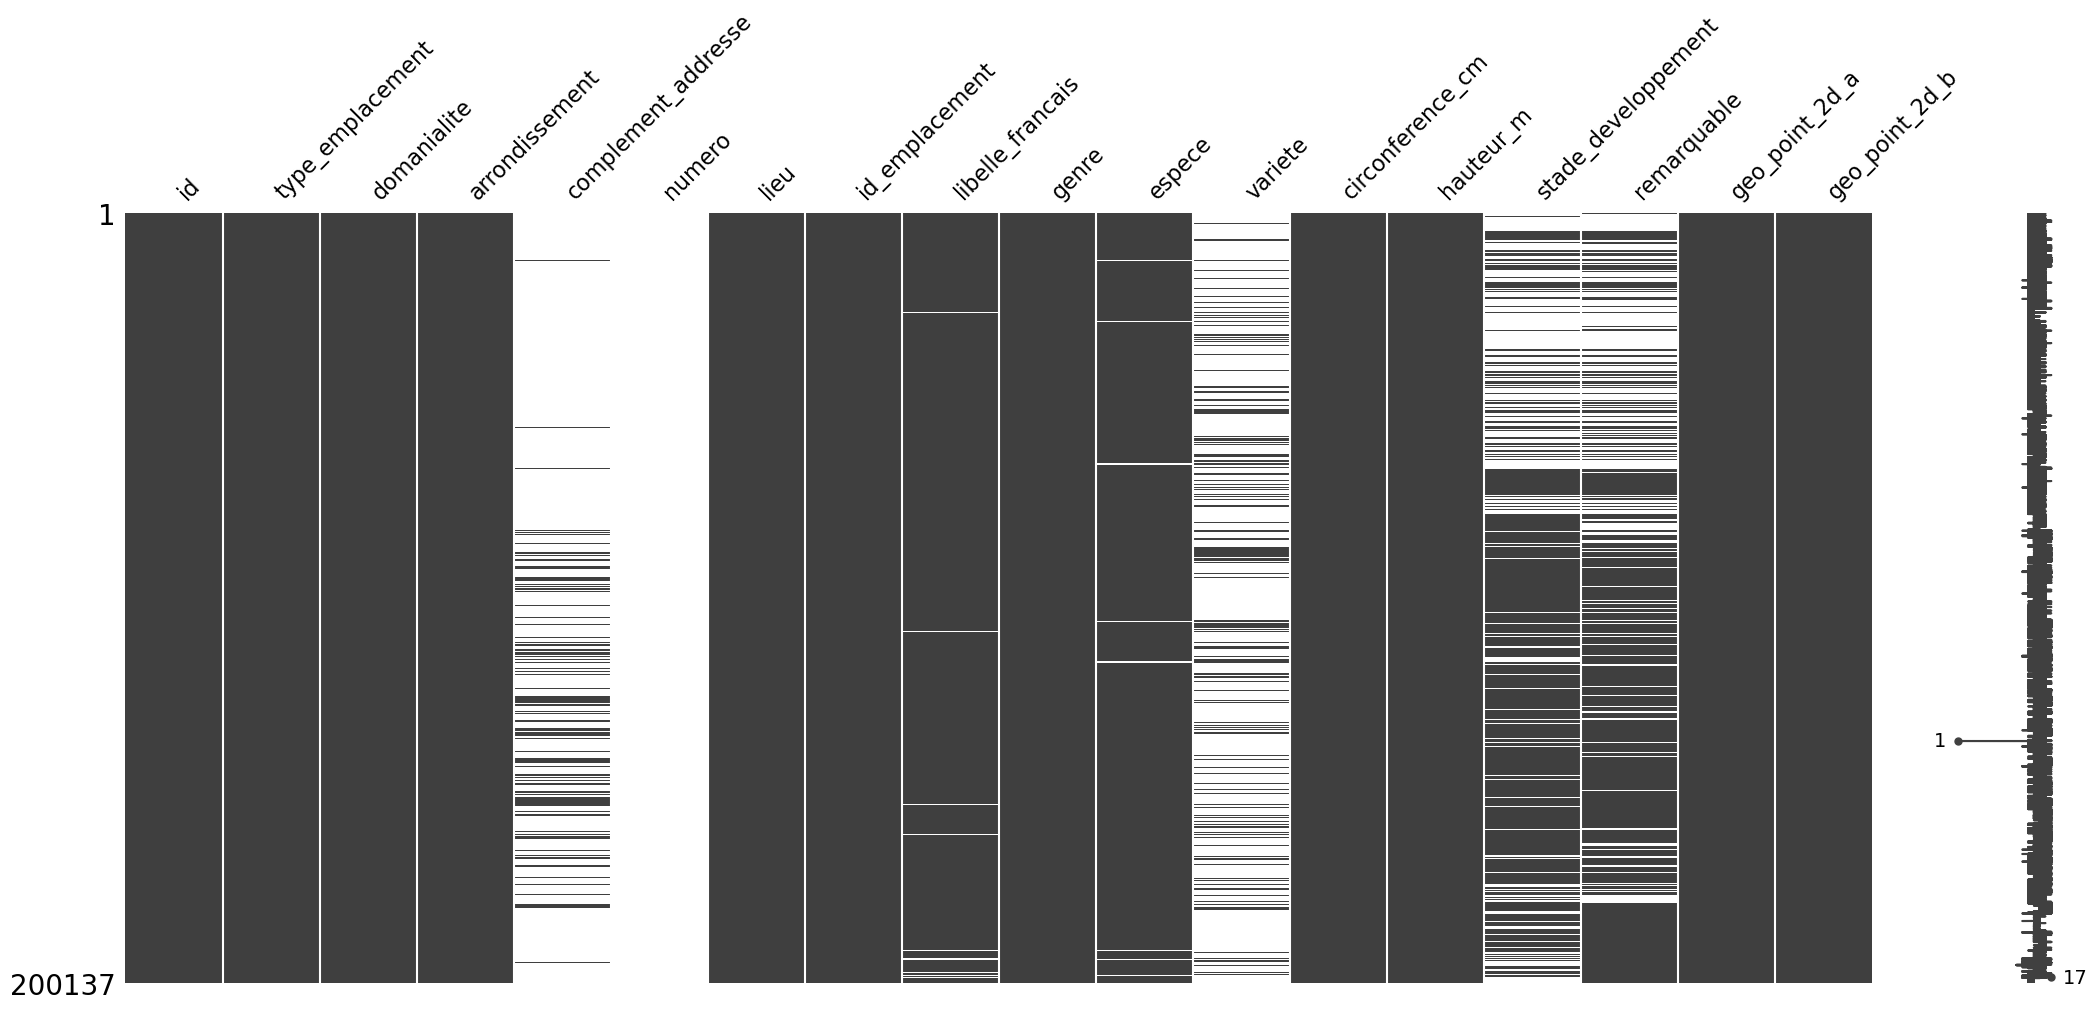

In [9]:
msno.matrix(arbres)

<AxesSubplot:>

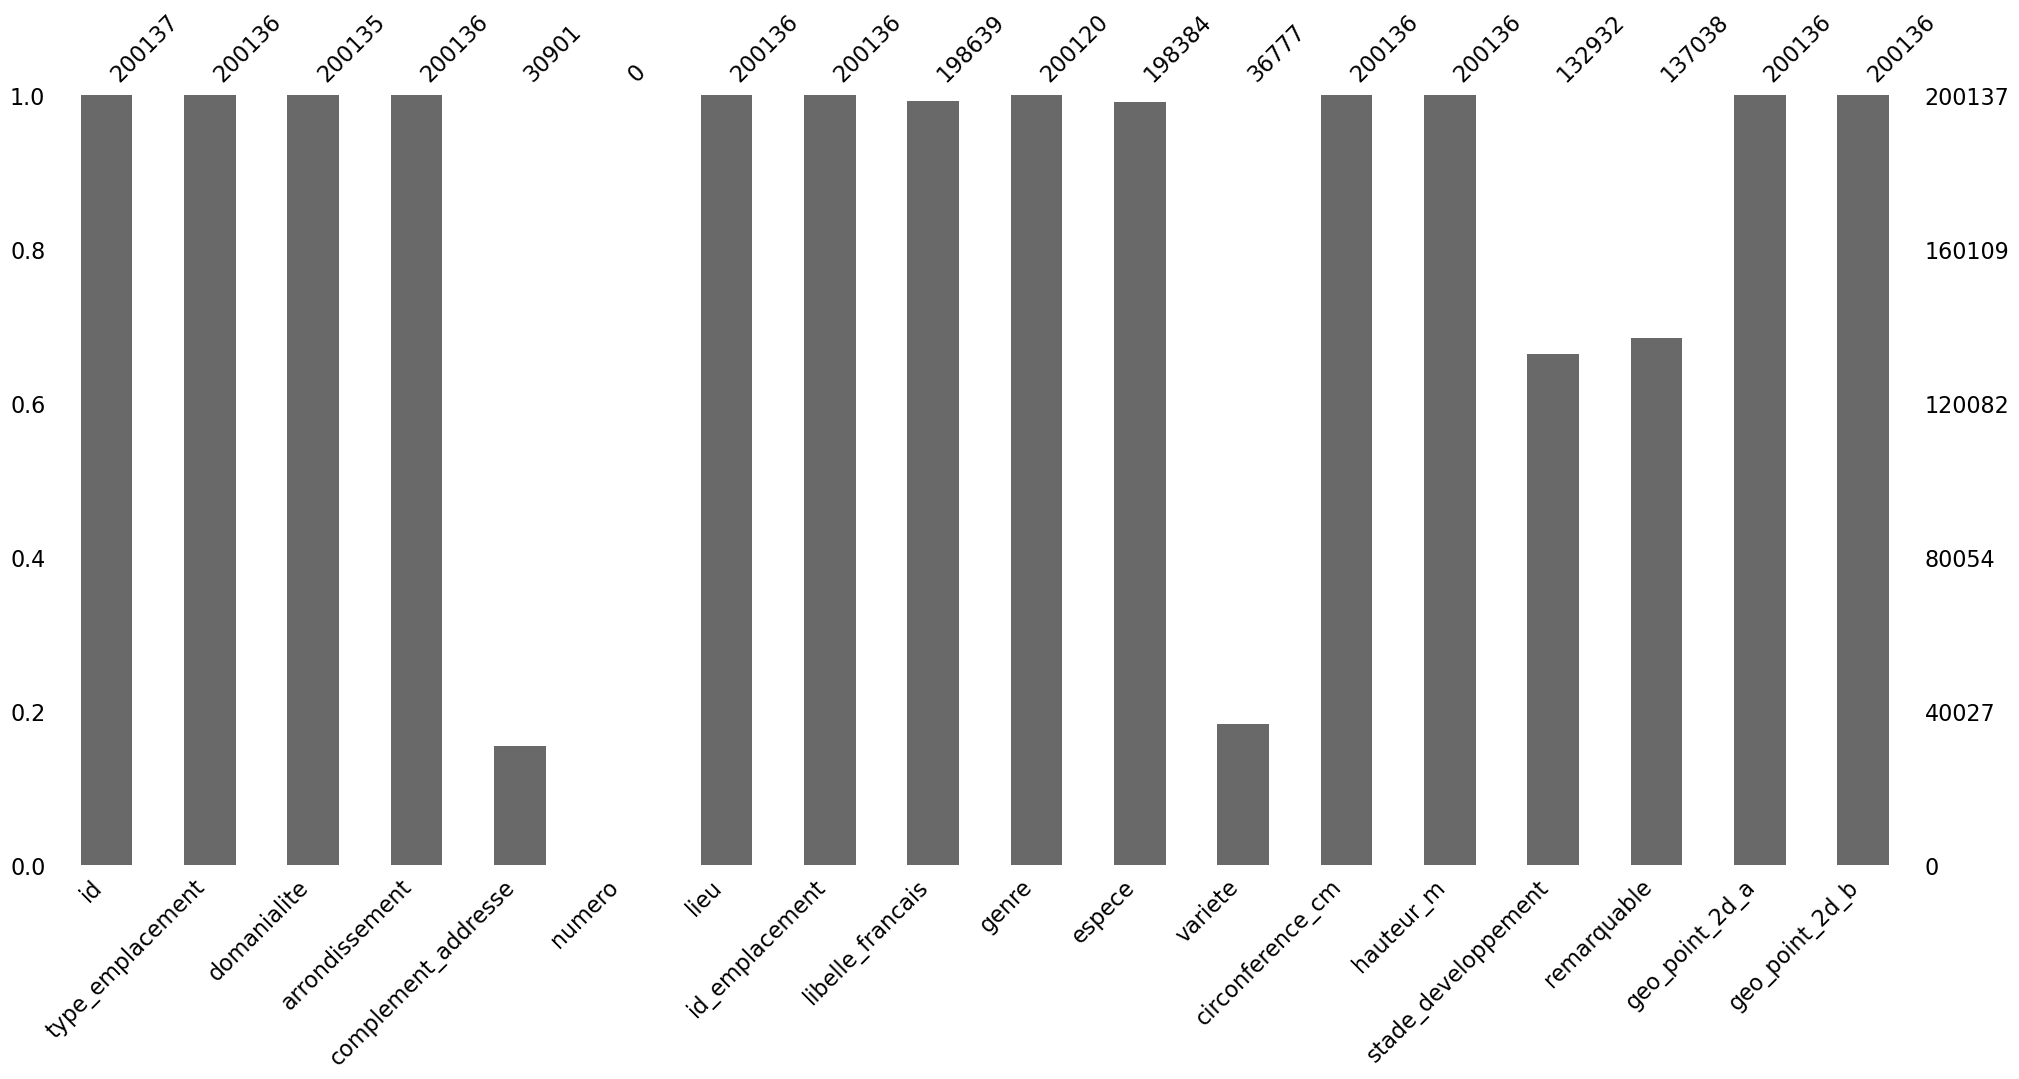

In [10]:
msno.bar(arbres)

<AxesSubplot:>

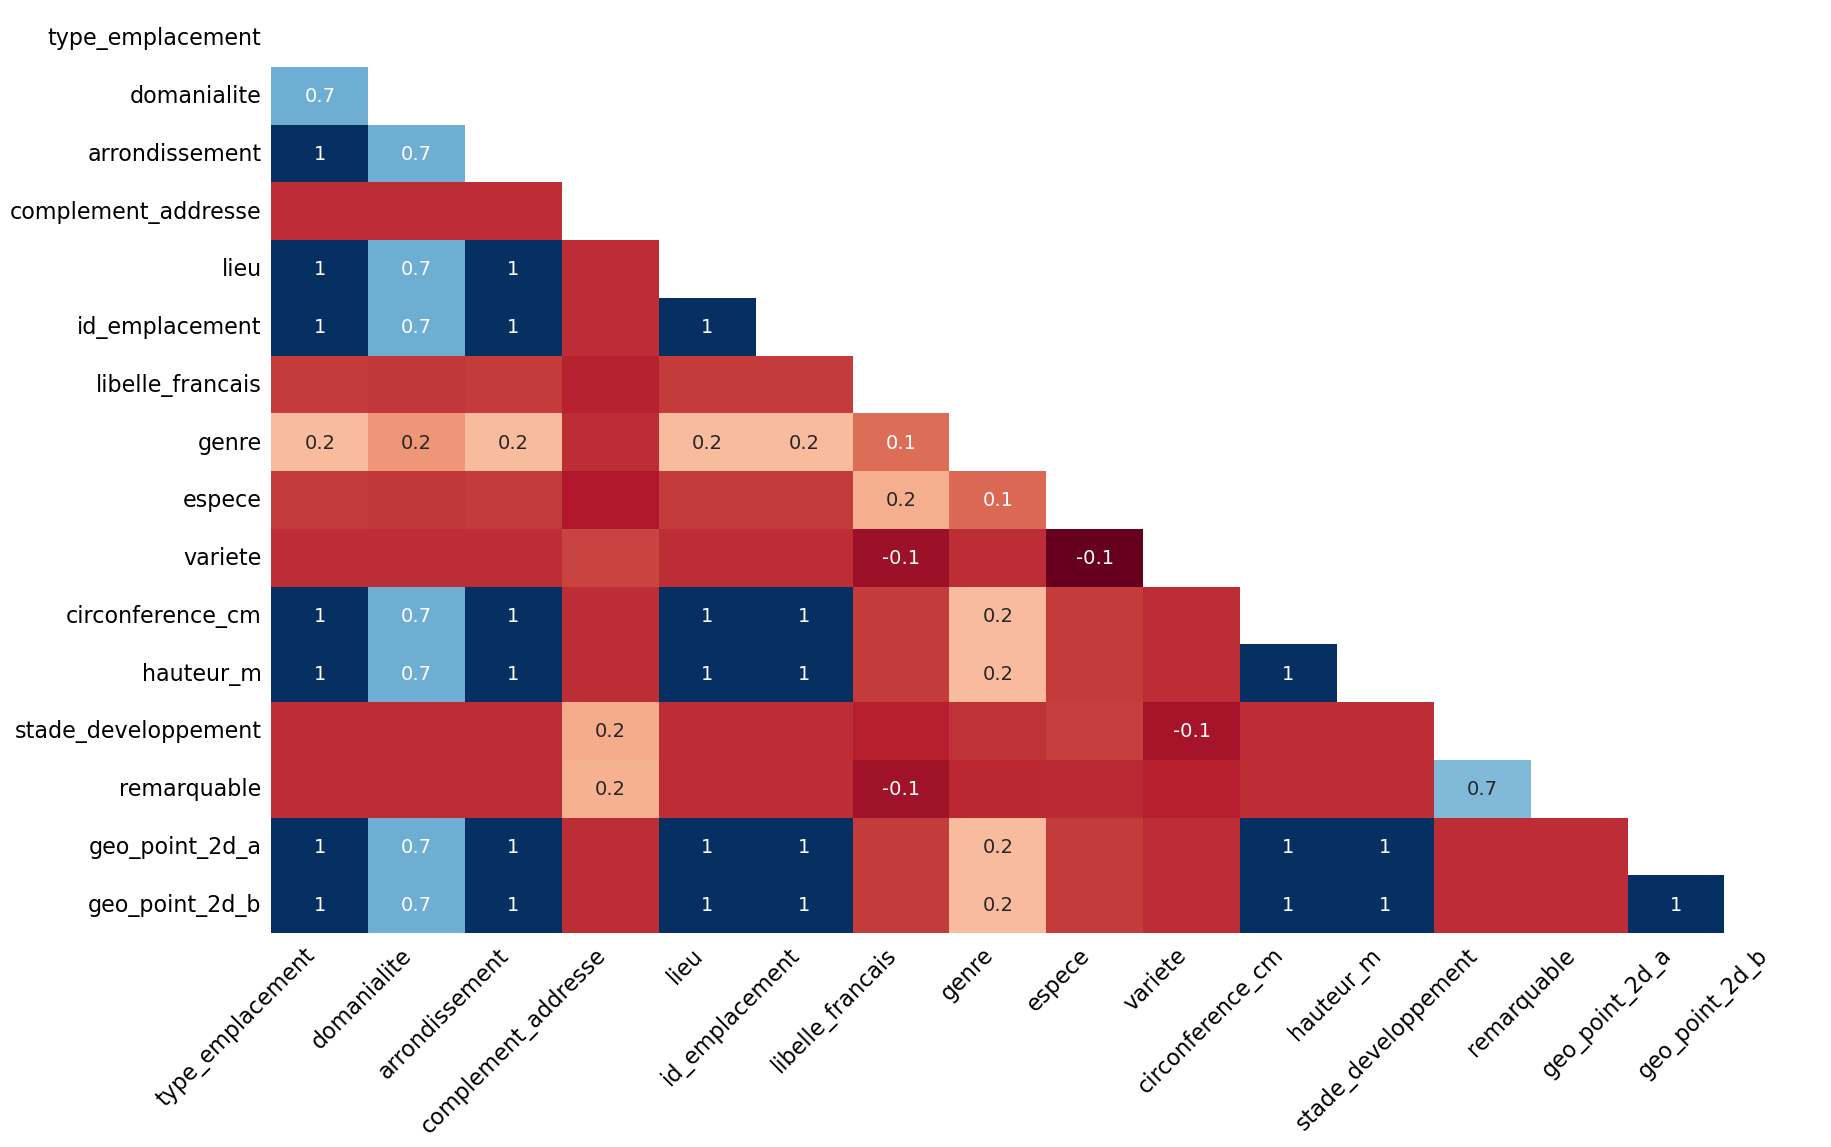

In [11]:
msno.heatmap(arbres)

In [12]:
 manq=arbres.isna().mean()

In [13]:
manq = manq * 100
manq

id                       0.000000
type_emplacement         0.000500
domanialite              0.000999
arrondissement           0.000500
complement_addresse     84.560076
numero                 100.000000
lieu                     0.000500
id_emplacement           0.000500
libelle_francais         0.748487
genre                    0.008494
espece                   0.875900
variete                 81.624088
circonference_cm         0.000500
hauteur_m                0.000500
stade_developpement     33.579498
remarquable             31.527903
geo_point_2d_a           0.000500
geo_point_2d_b           0.000500
dtype: float64

In [14]:
arbres.duplicated('id').sum()

0

In [15]:
croiss = arbres.sort_values(by='circonference_cm', ascending=True).reset_index()
croiss = croiss.drop(['index', 'complement_addresse', 'numero', 'id_emplacement', 'variete', 'id', 'type_emplacement', 'domanialite', 'arrondissement', 'lieu', 'libelle_francais', 'genre', 'espece', 'hauteur_m', 'stade_developpement',  'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'], axis=1)
croiss

,circonference_cm
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
200132,65110.0
200133,79120.0
200134,120170.0
200135,250255.0


On souhaite savoir le nombre d'arbres par arrondissement de Paris

In [16]:
abr1 = arbres.groupby('arrondissement')['id'].count().reset_index()
abr1.columns = ['arrondissement','nombre']
abr1 

,arrondissement,nombre
0,BOIS DE BOULOGNE,3978
1,BOIS DE VINCENNES,11510
2,HAUTS-DE-SEINE,5298
3,PARIS 10E ARRDT,3385
4,PARIS 11E ARRDT,5658
5,PARIS 12E ARRDT,12600
6,PARIS 13E ARRDT,16712
7,PARIS 14E ARRDT,11399
8,PARIS 15E ARRDT,17151
9,PARIS 16E ARRDT,16403


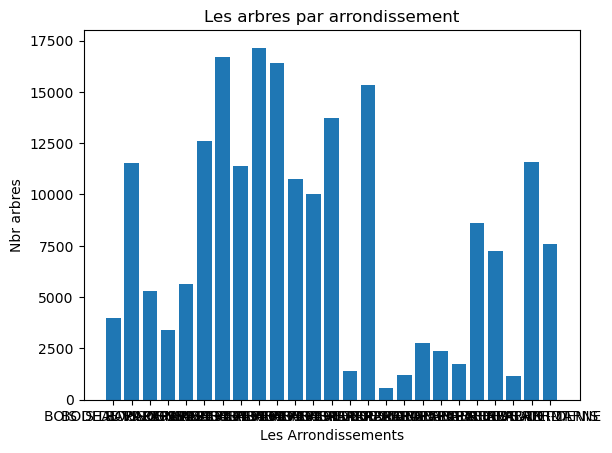

In [19]:
plt.bar(height=abr1['nombre'], x=abr1['arrondissement'])
#sns.set_theme(style='whitegrid', palette='pastel')
plt.title("Les arbres par arrondissement")
plt.xlabel("Les Arrondissements")
plt.ylabel("Nbr arbres")
plt.show()

In [20]:
arbres.tail(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0.0,0.0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0.0,0.0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0.0,0.0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0.0,0.0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0.0,0.0,NaN,0.0,48.820445,2.454856


In [42]:
arbre_d = arbres.drop(['complement_addresse', 'numero', 'id_emplacement', 'variete', 'circonference_cm', 'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'], axis=1)

In [43]:
arbre_d

,id,type_emplacement,domanialite,arrondissement,lieu,libelle_francais,genre,espece,hauteur_m,stade_developpement
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,5.0,NaN
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,8.0,A
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,10.0,A
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,8.0,A
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,Castanea,fargesii,0.0,NaN
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,Davidia,involucrata,0.0,NaN
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,Populus,simonii,0.0,NaN
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,Quercus,n. sp.,0.0,NaN


In [44]:
arbre_d2 = arbre_d.drop(['arrondissement', 'genre', 'stade_developpement', 'domanialite', 'hauteur_m'], axis=1)

In [45]:
arbre_d2

,id,type_emplacement,lieu,libelle_francais,espece
0,99874,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,hippocastanum
1,99875,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
2,99876,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
3,99877,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,negundo
4,99878,Arbre,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,daniellii
...,...,...,...,...,...
200132,2024741,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,fargesii
200133,2024742,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,involucrata
200134,2024743,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,simonii
200135,2024744,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,n. sp.


In [46]:
arbre_simpl = arbre_d2
arbre_simpl

,id,type_emplacement,lieu,libelle_francais,espece
0,99874,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,hippocastanum
1,99875,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
2,99876,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata
3,99877,Arbre,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,negundo
4,99878,Arbre,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,daniellii
...,...,...,...,...,...
200132,2024741,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,NaN,fargesii
200133,2024742,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Arbre aux mouchoirs,involucrata
200134,2024743,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Peuplier,simonii
200135,2024744,Arbre,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,Chêne,n. sp.


In [47]:
arbre_d3 = arbre_d2.dropna(axis=0)

In [48]:
arbre_d3.shape

(197252, 5)

In [49]:
arbre_d3.describe()

,id,type_emplacement,lieu,libelle_francais,espece
count,197252,197252,197252,197252,197252
unique,197252,1,6876,191,520
top,99874,Arbre,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,x hispanica
freq,1,197252,2983,42505,36242


In [50]:
arbre_d3['libelle_francais'].value_counts()

Platane       42505
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Maackie           1
Jujubier          1
Camphrier         1
Sycopsis          1
Garrya            1
Name: libelle_francais, Length: 191, dtype: int64

In [51]:
#arbres['genre'].hist()

In [52]:
arbre_g = arbres['arrondissement'].value_counts().reset_index()
arbre_g.columns = ['arrondissement','nombre']
arbre_g

,arrondissement,nombre
0,PARIS 15E ARRDT,17151
1,PARIS 13E ARRDT,16712
2,PARIS 16E ARRDT,16403
3,PARIS 20E ARRDT,15340
4,PARIS 19E ARRDT,13709
5,PARIS 12E ARRDT,12600
6,SEINE-SAINT-DENIS,11570
7,BOIS DE VINCENNES,11510
8,PARIS 14E ARRDT,11399
9,PARIS 17E ARRDT,10761


In [53]:
arbre_g.shape

(25, 2)

In [54]:
#arbre_g['arrondissement'].hist()

In [55]:
vue=arbres.groupby(['arrondissement','lieu','genre']) ['circonference_cm'].value_counts()
vue.shape

(86181,)

In [56]:
vue.sort_values()

arrondissement     lieu                                         genre     circonference_cm
PARIS 17E ARRDT    SQUARE DES BATIGNOLLES                       Acer      18.0                  1
PARIS 19E ARRDT    PLACE RHIN ET DANUBE                         Platanus  35.0                  1
                                                                          55.0                  1
                                                                          70.0                  1
                                                                          115.0                 1
                                                                                             ... 
BOIS DE VINCENNES  AVENUE DES TRIBUNES                          Platanus  0.0                 248
                   ROUTE DAUPHINE                               Tilia     0.0                 305
                   PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE  Quercus   0.0                 310
                           

In [57]:
vue

arrondissement    lieu                                                    genre     circonference_cm
BOIS DE BOULOGNE  ALLEE DE LA REINE MARGUERITE                            Acer      30.0                11
                                                                                    25.0                 9
                                                                                    42.0                 8
                                                                                    40.0                 7
                                                                                    43.0                 7
                                                                                                        ..
VAL-DE-MARNE      CIMETIERE DE THIAIS / AVENUE TRANSVERSALE N3 / DIV 122  Platanus  0.0                  5
                  CIMETIERE DE THIAIS / DIV 94                            Malus     20.0                 1
                  CIMETIERE DE THIAIS / ENT